# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Valldynsyah Danuarta
- **Email:** valldynsyah@gmail.com
- **ID Dicoding:** valldynsyahdanuarta

## Menentukan Pertanyaan Bisnis

- Bagaimana profil demografi pelanggan?
- Seberapa puas pelanggan terhadap layanan diberikan?
- Berapa banyak uang yang dihabiskan oleh pelanggan dalam beberapa bulan terakhir?
- Produk apa yang paling laris dan mana yang kurang diminati?
- Dimana lokasi geografis dengan jumlah pelanggan terbanyak?
- Bagaimana tren performa penjualan di platform E-Commerce seiring waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install pipreqs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
!pip install unidecode
import unidecode
import matplotlib.image as mpimg
import gc

## Data Wrangling

### Gathering Data


In [4]:
df_customers=pd.read_csv('/content/drive/MyDrive/TUGAS/Submission Proyek Analisis Data/DATASET/olist_customers_dataset.csv')
df_geolocation=pd.read_csv('/content/drive/MyDrive/TUGAS/Submission Proyek Analisis Data/DATASET/olist_geolocation_dataset.csv')
df_order_items=pd.read_csv('/content/drive/MyDrive/TUGAS/Submission Proyek Analisis Data/DATASET/olist_order_items_dataset.csv')
df_order_payments=pd.read_csv('/content/drive/MyDrive/TUGAS/Submission Proyek Analisis Data/DATASET/olist_order_payments_dataset.csv')
df_order_reviews=pd.read_csv('/content/drive/MyDrive/TUGAS/Submission Proyek Analisis Data/DATASET/olist_order_reviews_dataset.csv')
df_orders=pd.read_csv('/content/drive/MyDrive/TUGAS/Submission Proyek Analisis Data/DATASET/olist_orders_dataset.csv')
df_products=pd.read_csv('/content/drive/MyDrive/TUGAS/Submission Proyek Analisis Data/DATASET/olist_products_dataset.csv')
df_sellers=pd.read_csv('/content/drive/MyDrive/TUGAS/Submission Proyek Analisis Data/DATASET/olist_sellers_dataset.csv')
df_product_category_name_translation=pd.read_csv('/content/drive/MyDrive/TUGAS/Submission Proyek Analisis Data/DATASET/product_category_name_translation.csv')

In [5]:
datasets = [
    ("Customers", df_customers),
    ("Geolocation", df_geolocation),
    ("Order Items", df_order_items),
    ("Order Payments", df_order_payments),
    ("Order Reviews", df_order_reviews),
    ("Orders", df_orders),
    ("Products", df_products),
    ("Sellers", df_sellers),
    ("Product Category Translation", df_product_category_name_translation)
]

for name, df in datasets:
    print(f"Displaying {name} dataset:")
    print(df.head())
    print("\n")

Displaying Customers dataset:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


Displaying Geolocation dataset:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                    

### Assessing Data

In [6]:
def check_missing_and_duplicates(df, df_name):
    print(f"Missing values in {df_name}:")
    print(df.isnull().sum())

    print(f"Duplicate rows in {df_name}: {df.duplicated().sum()}\n")

check_missing_and_duplicates(df_customers, 'df_customers')
check_missing_and_duplicates(df_geolocation, 'df_geolocation')
check_missing_and_duplicates(df_order_items, 'df_order_items')
check_missing_and_duplicates(df_order_payments, 'df_order_payments')
check_missing_and_duplicates(df_order_reviews, 'df_order_reviews')
check_missing_and_duplicates(df_orders, 'df_orders')
check_missing_and_duplicates(df_products, 'df_products')
check_missing_and_duplicates(df_sellers, 'df_sellers')
check_missing_and_duplicates(df_product_category_name_translation, 'df_product_category_name_translation')

Missing values in df_customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicate rows in df_customers: 0

Missing values in df_geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Duplicate rows in df_geolocation: 261831

Missing values in df_order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplicate rows in df_order_items: 0

Missing values in df_order_payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Duplicate rows in df_order_payments: 0

Missing values in df_order_reviews:
r

In [7]:
def check_dataframe_info(df, df_name):
    print(f"Info for {df_name}:")
    df.info()
    print(f"\nDescription for {df_name}:")
    print(df.describe(include='all'))
    print("\n" + "="*50 + "\n")

check_dataframe_info(df_customers, "Customers")
check_dataframe_info(df_geolocation, "Geolocation")
check_dataframe_info(df_order_items, "Order Items")
check_dataframe_info(df_order_payments, "Order Payments")
check_dataframe_info(df_order_reviews, "Order Reviews")
check_dataframe_info(df_orders, "Orders")
check_dataframe_info(df_products, "Products")
check_dataframe_info(df_sellers, "Sellers")
check_dataframe_info(df_product_category_name_translation, "Product Category Name Translation")

Info for Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Description for Customers:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                      

### Cleaning Data

Drop duplicate rows and NaN Values

In [8]:
# df_geolocation.drop_duplicates(inplace=True)
# df_order_reviews.dropna(axis=0, inplace=True)
# df_orders.dropna(axis=0, inplace=True)
# df_products.dropna(axis=0, inplace=True)

df_order_reviews[df_order_reviews.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [9]:
df_order_reviews.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
produto com lacre violado,1
Atraso Entrega,1
Top Show,1


In [10]:
df_order_reviews[df_order_reviews.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [11]:
df_order_reviews.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
qualidade.,1
chegou bem antes do prazo previsto,1
Ja respondi esse questionario.,1


In [12]:
df_order_reviews.fillna(value="no comment", inplace=True)

In [13]:
df_orders[df_orders.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [14]:
def check_missing_and_duplicates(df, df_name):
    print(f"Missing values in {df_name}:")
    print(df.isnull().sum())

    print(f"Duplicate rows in {df_name}: {df.duplicated().sum()}\n")

check_missing_and_duplicates(df_customers, 'df_customers')
check_missing_and_duplicates(df_geolocation, 'df_geolocation')
check_missing_and_duplicates(df_order_items, 'df_order_items')
check_missing_and_duplicates(df_order_payments, 'df_order_payments')
check_missing_and_duplicates(df_order_reviews, 'df_order_reviews')
check_missing_and_duplicates(df_orders, 'df_orders')
check_missing_and_duplicates(df_products, 'df_products')
check_missing_and_duplicates(df_sellers, 'df_sellers')
check_missing_and_duplicates(df_product_category_name_translation, 'df_product_category_name_translation')

Missing values in df_customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicate rows in df_customers: 0

Missing values in df_geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Duplicate rows in df_geolocation: 261831

Missing values in df_order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplicate rows in df_order_items: 0

Missing values in df_order_payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Duplicate rows in df_order_payments: 0

Missing values in df_order_reviews:
r

In [15]:
def check_dataframe_info(df, df_name):
    print(f"Info for {df_name}:")
    df.info()
    print(f"\nDescription for {df_name}:")
    print(df.describe(include='all'))
    print("\n" + "="*50 + "\n")

check_dataframe_info(df_customers, "Customers")
check_dataframe_info(df_geolocation, "Geolocation")
check_dataframe_info(df_order_items, "Order Items")
check_dataframe_info(df_order_payments, "Order Payments")
check_dataframe_info(df_order_reviews, "Order Reviews")
check_dataframe_info(df_orders, "Orders")
check_dataframe_info(df_products, "Products")
check_dataframe_info(df_sellers, "Sellers")
check_dataframe_info(df_product_category_name_translation, "Product Category Name Translation")

Info for Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Description for Customers:
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                      

In [16]:
datetime_oi = ["shipping_limit_date"]

for column in datetime_oi:
  df_order_items[column] = pd.to_datetime(df_order_items[column])

In [17]:
datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  df_order_reviews[column] = pd.to_datetime(df_order_reviews[column])

In [18]:
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_oo:
  df_orders[column] = pd.to_datetime(df_orders[column])

## Exploratory Data Analysis (EDA)

### Explore df_customers

In [19]:
df_customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
79566,6a352323e9ea3442a66aa0e556579967,949a5efc8cd62cbe3888026bd0ddd1f6,48967,nucleo residencial pilar,BA
67110,abda27cb02d4536c98bc0c41e6245317,a494baf243b5b3dc416a4b81b3aa52d7,13140,paulinia,SP
83311,d857da430914a545da2201e96e5bce9c,d0e376592a3036444738ee6a426785c1,4675,sao paulo,SP
35439,1f8a895c0b8586884d309779642266d4,3b8fa5764ce2909afcc708128463da8f,29051,vitoria,ES
86943,802afc498fb100ca6ee8ef029719e141,1199ef97a7ec9785fec893f207e601ef,2514,sao paulo,SP


In [20]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [21]:
df_customers.customer_id.is_unique

True

In [22]:
df_customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ponto novo,1
populina,1
porteiras,1


In [23]:
df_customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [24]:
df_order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
16558,cf101c3abd3c061ca9f78c1bbb1125af,12,voucher,1,8.46
42076,b16d1a2fcbe45897eb78950e1b542c63,1,credit_card,1,71.85
2368,73a516c7297dcd6a809778fd0cb8bdd4,1,voucher,1,193.46
42333,395fcc8123e7a3a7c5054d6dae0dad9e,1,credit_card,4,48.22
19248,f3584b023b097595c8e2b0b6fd51a839,1,credit_card,1,78.86


In [25]:
df_order_payments.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [26]:
df_order_payments.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [27]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
31106,6318d8c5f6857de384c0b3186d036457,e16043b6c48d4fcfcf5500300001a665,delivered,2017-06-08 20:02:41,2017-06-09 19:55:14,2017-06-13 14:38:45,2017-06-26 13:08:19,2017-07-14
53251,c1808aaca844e2210da16bb46767586c,2d88e5d523368eaa7df260c1fba930b0,delivered,2017-11-24 10:23:27,2017-11-24 12:32:10,2017-11-29 21:21:15,2017-12-06 21:12:37,2017-12-20
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02
96541,5c7ec55f4ff082a66c4ed58a2634af16,34fd70c1a2c8eb090994690ff3cfdd0c,delivered,2017-11-24 22:38:15,2017-11-28 03:33:09,2017-12-08 16:17:38,2017-12-15 17:37:50,2017-12-11
91912,701497f084be73caaae3efa1dad2422a,eba0792cf35e2ab2db2dcb391adb5ab4,delivered,2017-08-20 17:13:52,2017-08-20 17:30:17,2017-08-22 18:55:54,2017-08-24 18:00:17,2017-09-11


In [28]:
delivery_time = df_orders["order_delivered_customer_date"] - df_orders["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
df_orders["delivery_time"] = round(delivery_time/86400)

In [29]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
19861,1bb50def8a9e13b440ff996070fda0e9,a2b143271cf09e54d3754639196b1afe,delivered,2017-06-08 11:30:04,2017-06-08 13:06:01,2017-06-09 17:55:33,2017-06-14 17:57:50,2017-07-03,5.0
52772,8e500747ed0fbfd6b89bb11955b3ccbf,8dad9347d1a281ed85a300a7be9d0647,delivered,2017-05-17 12:49:38,2017-05-17 13:11:12,2017-05-18 08:26:53,2017-05-26 07:22:09,2017-05-30,8.0
69247,dd4cd6ebc3cef5658a5a0b35c7d5e417,ef81b90301795cbf03ef944ee16ed438,delivered,2018-02-26 19:29:46,2018-02-27 19:30:25,2018-02-28 23:19:11,2018-03-13 20:11:11,2018-03-19,13.0
87255,f0b28558fa13c7391016b869eded8a0d,6f90c8656c371ac9988510b58a6d1e62,delivered,2018-04-18 20:35:13,2018-04-18 20:50:33,2018-04-24 19:54:27,2018-05-07 17:28:54,2018-05-22,13.0
17824,f96187641653e607ec1001aff62bdff0,d19e43bfc6c14d83b972cf699985898e,delivered,2017-11-25 00:05:10,2017-11-25 02:54:34,2017-11-27 20:02:59,2017-11-29 19:17:59,2017-12-11,2.0


<Axes: >

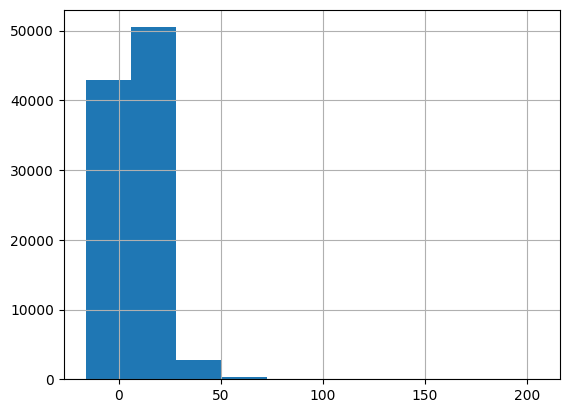

In [30]:
df_orders.delivery_time.hist()

In [31]:
customer_id_in_df_orders = df_orders.customer_id.values
df_customers["status"] = df_customers["customer_id"].apply(lambda x: "Active" if x in customer_id_in_df_orders else "Non Active")
df_customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
11950,927915ecedbdb6b7d5af71a55721af3d,452363ca0f726377078215d51ebc176d,62430,granja,CE,Active
28558,187eff014e217a4f13317d72024f4a93,47d794d3b9191cca973e14771f951dc4,26600,paracambi,RJ,Active
71989,33add7528833f57795e0549ea17dd0b3,198dc221b76657718f8c38d49daa83c9,14040,ribeirao preto,SP,Active
96772,8bc5bd186338cf7f9b134aeed904d8d0,1c98969880c8c7c522bc4677dfce9384,27123,barra do pirai,RJ,Active
70285,aab3dae5b97f7188749343fe78c8947e,fdab4dca785d25c837988c629b0c4777,16880,valparaiso,SP,Active


In [32]:
df_customers.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


Merge df_customers & df_orders

In [33]:
df_cust_orders = pd.merge(
    left=df_customers,
    right=df_orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
df_cust_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [34]:
df_cust_orders.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


In [35]:
df_cust_orders.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [36]:
df_cust_orders.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_zip_code_prefix,
22790,142
24220,124
22793,121
24230,117
22775,110
29101,101
13212,95
35162,93
22631,89


In [37]:
df_cust_orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


Merge df_order_payrev & df_order_reviews

In [38]:
df_order_payrev = pd.merge(
    left=df_order_payments,
    right=df_order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
df_order_payrev.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [39]:
df_order_payrev.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [40]:
df_order_payrev.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,no comment,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
44001,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00,8d0e1d286cc6f63e3a784779c9d1f7d8,4.0,no comment,no comment,2017-11-09,2018-02-14 13:57:57
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,no comment,2018-08-24,2018-08-25 02:24:54


In [41]:
df_order_payrev.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

Merge df_cust_orders & df_order_payrev

In [42]:
df_customers = pd.merge(
    left=df_cust_orders,
    right=df_order_payrev,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore df_order_items & df_sellers

Merge df_order_items & df_sellers

In [43]:
df_item_seller = pd.merge(
    left=df_order_items,
    right=df_sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
df_item_seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [44]:
df_item_seller.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


### Explore df_products & df_product_category_name_translation

In [45]:
df_product = pd.merge(
    left=df_products,
    right=df_product_category_name_translation,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [46]:
df_product.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [47]:
df_product.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


Merge df_item_seller & df_product

In [48]:
df_sellers = pd.merge(
    left=df_product,
    right=df_item_seller,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
df_sellers.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [49]:
df_sellers.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,15,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
9327,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,19,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29609,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG


In [50]:
df_sellers.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore df_geolocation

In [51]:
df_geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
735738,59054,-5.810642,-35.218474,natal,RN
514972,28360,-21.126649,-41.678918,bom jesus do itabapoana,RJ
139687,5735,-23.630705,-46.747920,sao paulo,SP
633132,37501,-22.429049,-45.447422,itajuba,MG
983086,96835,-29.757891,-52.416170,santa cruz do sul,RS


In [52]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [53]:
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].apply(pretty_string)

In [54]:
df_geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
24220,1146
24230,1102
38400,965
35500,907
11680,879
...,...
48922,1
70065,1
70068,1


In [55]:
df_geolocation[df_geolocation['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


### Explore All Data

Merge all data except geolocation

In [56]:
all_data = pd.merge(
    left=df_customers,
    right=df_sellers,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [57]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              118966 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117057 non-null  datetime64[ns]
 11  

In [58]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
}).sort_values(by="price", ascending=False)

price  freight_value
customer_city    product_category_name_english                            
sao paulo        health_beauty                    195263.02       23444.32
                 bed_bath_table                   184140.58       32057.43
                 watches_gifts                    172269.07        9985.67
                 sports_leisure                   154139.05       21159.67
                 computers_accessories            147079.12       17043.64
...                                                     ...            ...
areal            pet_shop                              5.50          15.10
tupa             construction_tools_construction       3.99          12.79
palmeira d'oeste computers_accessories                 3.90          11.85
caldas novas     fashion_underwear_beach               3.90          15.10
hortolandia      construction_tools_construction       0.85          18.23

[25199 rows x 2 columns]

In [59]:
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [60]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [61]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

Convert all_data to .csv

In [62]:
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana profil demografi pelanggan?

Berdasarkan customer_state

In [63]:
df_bystate = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
df_bystate.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
df_bystate.head()

,customer_state,customer_count
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


<ipython-input-64-6032ddd3b93b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state',
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to p

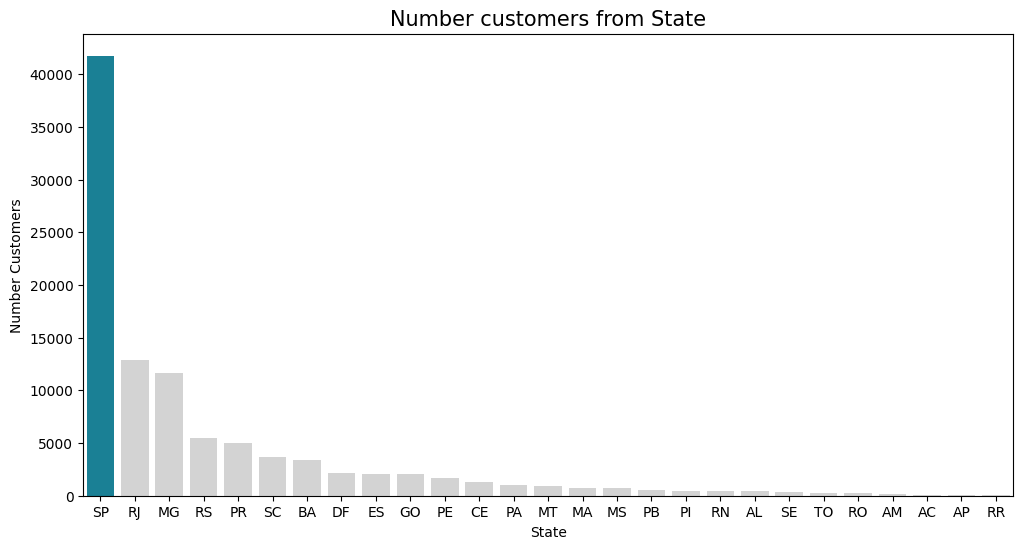

In [64]:
plt.figure(figsize=(12, 6))

most_common_state = df_bystate.loc[df_bystate['customer_count'].idxmax(), 'customer_state']

df_bystate = df_bystate.sort_values(by='customer_count', ascending=False)

sns.barplot(x='customer_state',
            y='customer_count',
            data=df_bystate,
            palette=["#068DA9" if state == most_common_state else "#D3D3D3" for state in df_bystate['customer_state']]
            )

plt.title("Number customers from State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number Customers")
plt.xticks(fontsize=10)
plt.show()

Berdasarkan state, SP memiliki data customer terbanyak.

<ipython-input-65-d1d2c66b71d0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_bycity.index,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pa

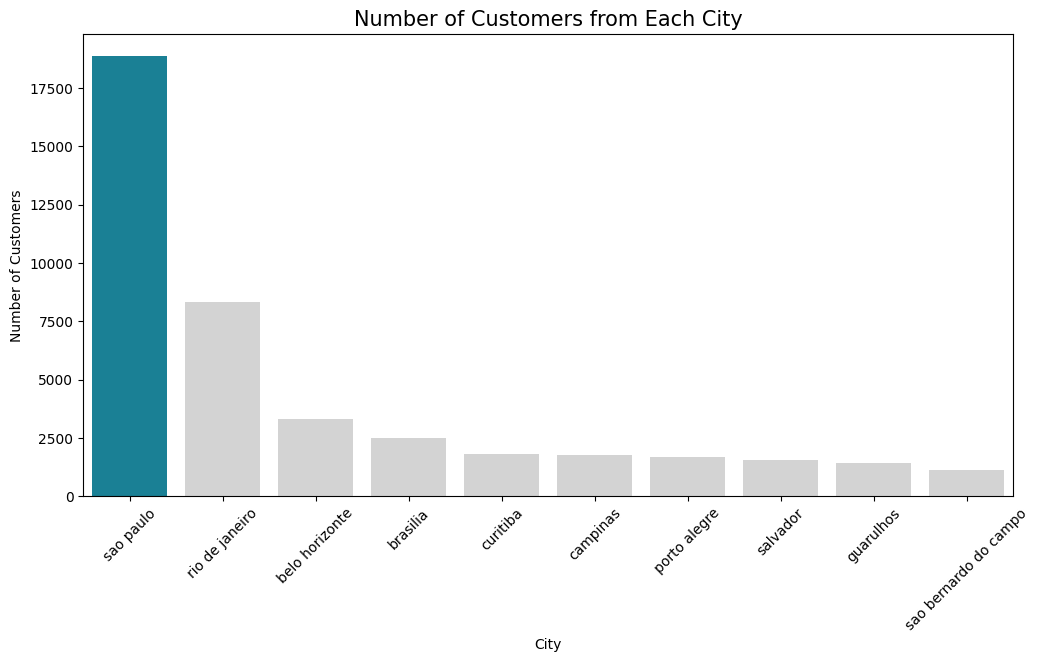

In [65]:
df_bycity = all_data['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_common_city = df_bycity.idxmax()

df_bycity = df_bycity.sort_values(ascending=False)

sns.barplot(x=df_bycity.index,
            y=df_bycity.values,
            palette=["#068DA9" if city == most_common_city else "#D3D3D3" for city in df_bycity.index]
            )

plt.title("Number of Customers from Each City", fontsize=15)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, fontsize=10)
plt.show()

Berdasarkan city, sao paulo memiliki data customer terbanyak.

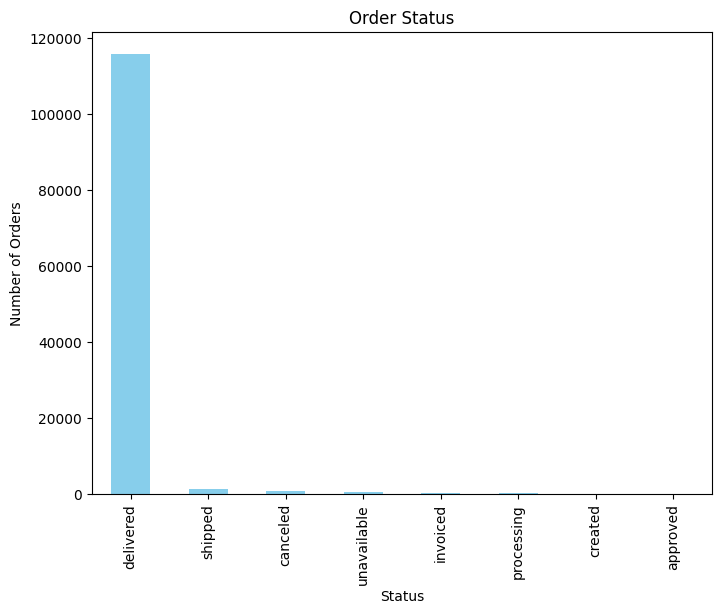

In [66]:
order_status_counts = all_data['order_status'].value_counts()

plt.figure(figsize=(8, 6))
order_status_counts.plot(kind='bar', color='skyblue')
plt.title('Order Status')
plt.xlabel('Status')
plt.ylabel('Number of Orders')
plt.show()

Status order paling banyak adalah delivered.

### Pertanyaan 2: Seberapa puas pelanggan terhadap layanan diberikan?

<ipython-input-67-a881c5dce057>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_scores.index,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need t

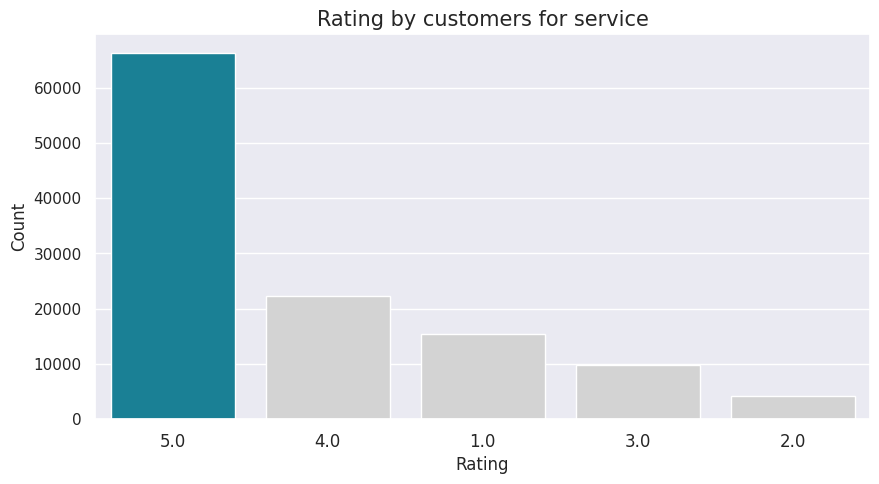

In [67]:
review_scores = all_data['review_score'].value_counts().sort_values(ascending=False)

most_common_score = review_scores.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=review_scores.index,
            y=review_scores.values,
            order=review_scores.index,
            palette=["#068DA9" if score == most_common_score else "#D3D3D3" for score in review_scores.index]
            )

plt.title("Rating by customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.show()

Customer sangat puas dengan layanan yang disediakan, terbukti dengan data bahwa customer yang memberikan rating 5 memiliki data terbanyak

## Pertanyaan 3: Berapa banyak uang yang dihabiskan oleh pelanggan dalam beberapa bulan terakhir?

In [68]:
df_monthly_spend = all_data.resample(rule='M', on='order_approved_at').agg({
    "payment_value":"sum"
})
df_monthly_spend.index = df_monthly_spend.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
df_monthly_spend = df_monthly_spend.reset_index()
df_monthly_spend.rename(columns={
    "payment_value":"total_spend"
}, inplace=True)
df_monthly_spend.head()

<ipython-input-68-c2134e749f11>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_spend = all_data.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,total_spend
0,September,0.00
1,October,75985.54
2,November,0.00
3,December,19.62
4,January,182178.36


In [69]:
df_monthly_spend = df_monthly_spend.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')

In [70]:
df_monthly_spend.head()

,order_approved_at,total_spend
12,September,927821.13
15,December,1092932.59
13,October,1138730.07
23,August,1268960.54
21,June,1306785.03


In [71]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}
df_monthly_spend.sort_values(by='total_spend')

,order_approved_at,total_spend
12,September,927821.13
15,December,1092932.59
13,October,1138730.07
23,August,1268960.54
21,June,1306785.03
17,February,1314882.87
22,July,1334156.42
16,January,1406557.66
19,April,1476502.25
18,March,1500474.01


In [72]:
df_monthly_spend["month_numeric"] = df_monthly_spend["order_approved_at"].map(month_mapping)
df_monthly_spend = df_monthly_spend.sort_values("month_numeric")
df_monthly_spend = df_monthly_spend.drop("month_numeric", axis=1)

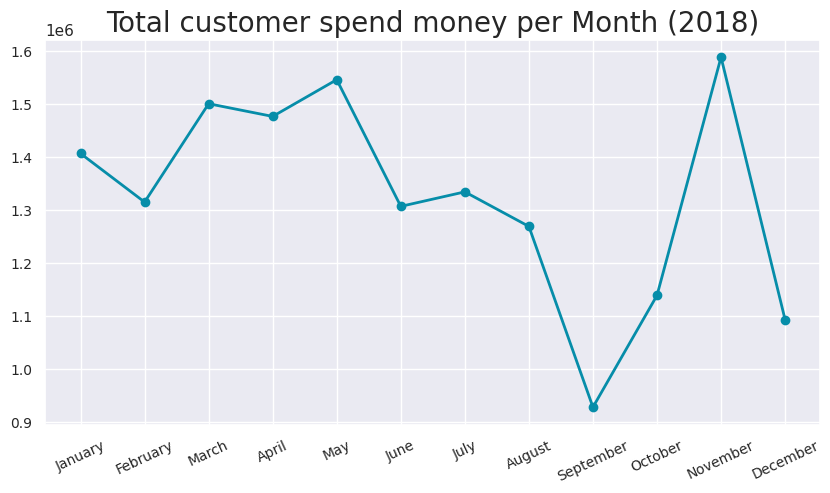

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(
    df_monthly_spend["order_approved_at"],
    df_monthly_spend["total_spend"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Total customer spend money per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

In [74]:
df_monthly_spend["total_spend"]

,total_spend
16,1406557.66
17,1314882.87
18,1500474.01
19,1476502.25
20,1545868.81
21,1306785.03
22,1334156.42
23,1268960.54
12,927821.13
13,1138730.07


Total uang yang dihabiskan paling banyak pada bilang November dan paling sedikit pada bulan September.

## Pertanyaan 4: Produk apa yang paling laris dan mana yang kurang diminati?

In [75]:
df_sum_order_items = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
df_sum_order_items = df_sum_order_items.rename(columns={"product_id": "products"})
df_sum_order_items = df_sum_order_items.sort_values(by="products", ascending=False)
df_sum_order_items = df_sum_order_items.head(10)

df_sum_order_items.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


<ipython-input-76-06c090234a84>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=df_sum_order_items.head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/

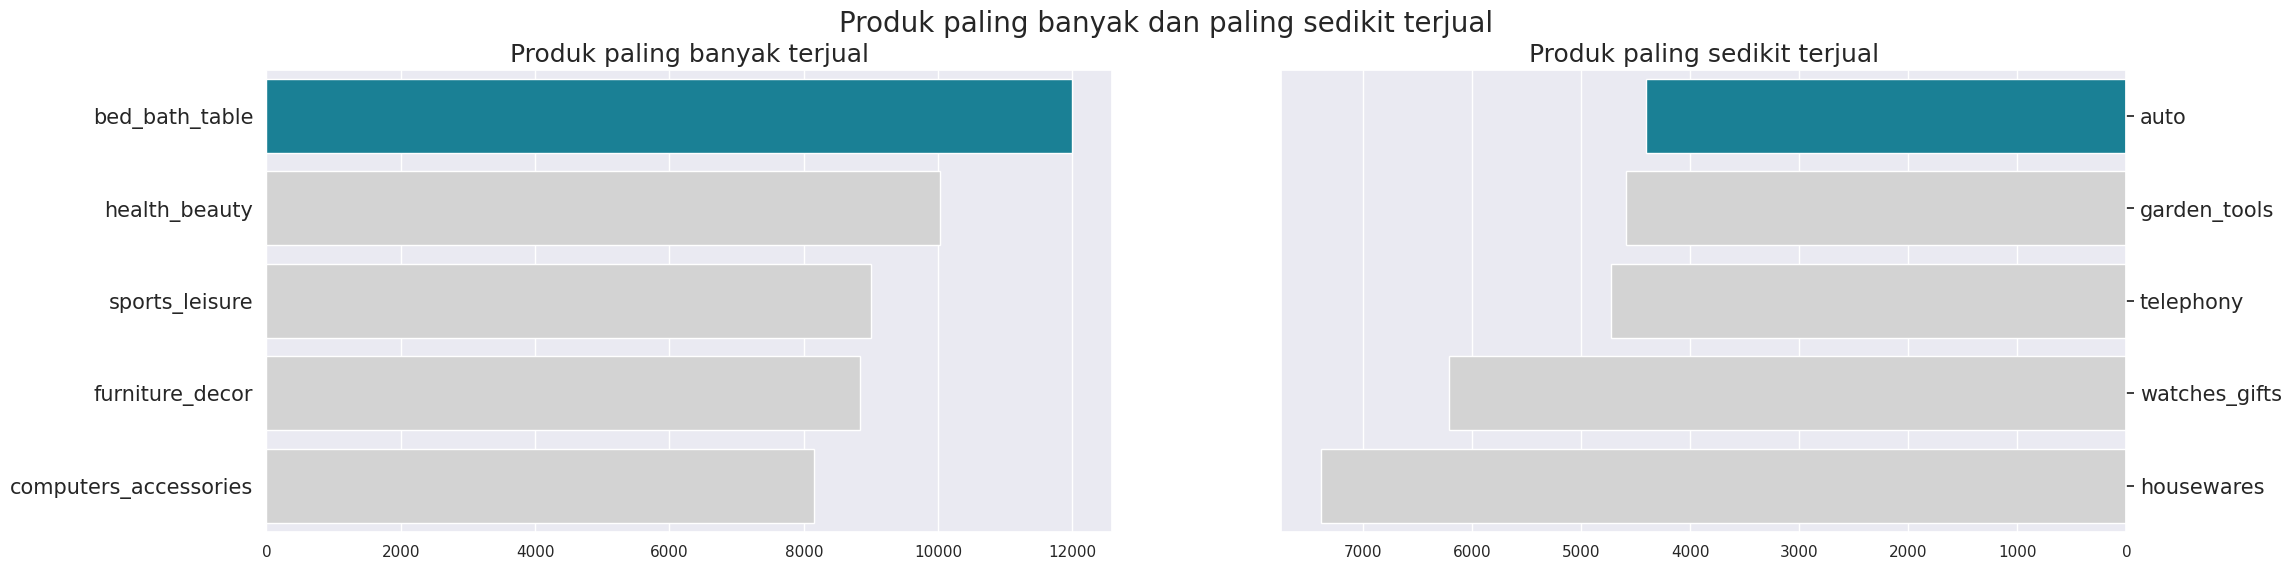

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="products", y="product_category_name_english", data=df_sum_order_items.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak terjual", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="products", y="product_category_name_english", data=df_sum_order_items.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

Produk yang paling banya terjual adalah bed_bath_table. dan produk yang paling sedikit terjual adalah auto.

## Pertanyaan 5: Dimana lokasi geografis dengan jumlah pelanggan terbanyak?

In [77]:
other_state_geolocation = df_geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = df_geolocation.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [78]:
geolocation_silver = df_geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [79]:
customers_silver = df_customers.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [80]:
customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.502070,-47.396822
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29,9790,sao bernardo do campo,SP,-23.727299,-46.542631
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59,1151,sao paulo,SP,-23.531294,-46.656404
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47,8775,mogi das cruzes,SP,-23.497390,-46.182342
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,13056,campinas,SP,-22.973309,-47.141530


In [81]:
customers_silver.to_csv("geolocation.csv", index=False)

In [82]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

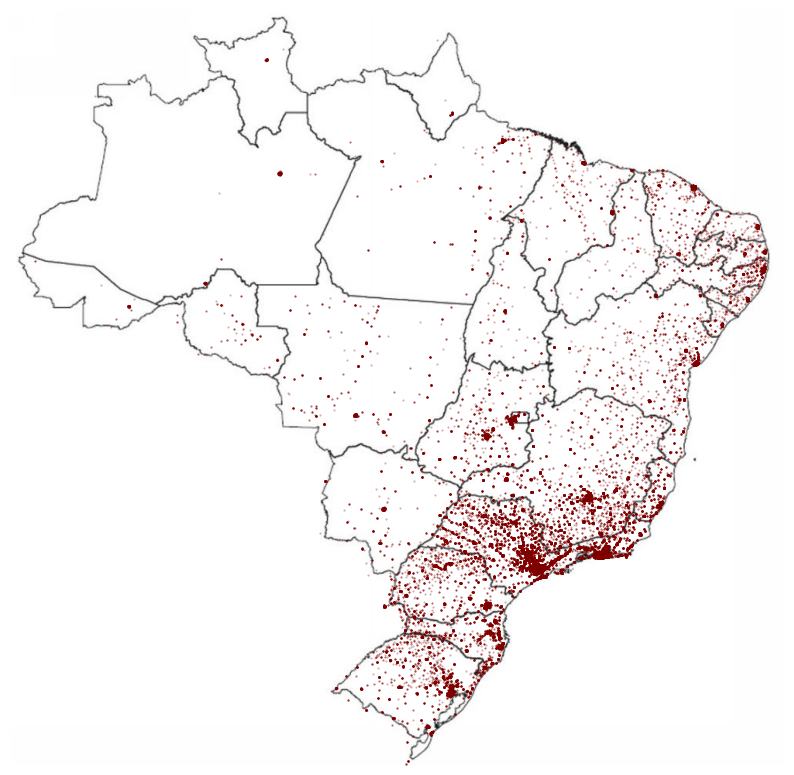

In [83]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

Banyak customer yang berasal dari negara bagian tenggara dan selatan

## Pertanyaan 6: Bagaimana tren performa penjualan di platform E-Commerce seiring waktu?

In [84]:
df_monthly = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})
df_monthly.index = df_monthly.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
df_monthly = df_monthly.reset_index()
df_monthly.rename(columns={
    "order_id": "order_count",
}, inplace=True)
df_monthly.head()


<ipython-input-84-8760e20fcd31>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = all_data.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760


In [85]:
df_monthly = df_monthly.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [86]:
df_monthly.head()

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176


In [87]:
df_monthly.sort_values(by='order_count')

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176
23,August,6620
17,February,6706
19,April,6778
20,May,7066
16,January,7187


In [88]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

df_monthly["month_numeric"] = df_monthly["order_approved_at"].map(month_mapping)
df_monthly = df_monthly.sort_values("month_numeric")
df_monthly = df_monthly.drop("month_numeric", axis=1)

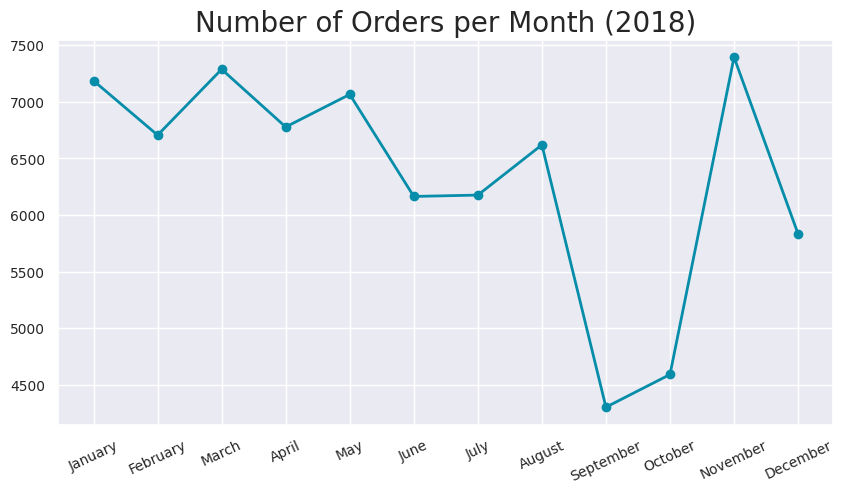

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(
    df_monthly["order_approved_at"],
    df_monthly["order_count"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

 Terjadi penurunan signifikan pada bulan September dan mengalami penaikan yang signifikan pada bulan November.

## Conclusion

Berdasarkan analisis penjualan di platform E-Commerce, dapat disimpulkan bahwa

1. **Profil Demografi Pelanggan:** Berdasarkan data yang ada, mayoritas pelanggan berasal dari negara bagian São Paulo (SP), dengan konsentrasi terbesar di kota São Paulo itu sendiri. Hal ini menunjukkan bahwa kawasan perkotaan terbesar di Brasil menjadi pasar utama bagi platform e-commerce ini. Selain itu, status pesanan yang paling umum adalah "delivered", yang mencerminkan kelancaran dalam proses pengiriman barang kepada pelanggan.

2. **Kepuasan Pelanggan:** Tingkat kepuasan pelanggan terhadap layanan yang diberikan sangat tinggi. Hal ini dibuktikan dengan mayoritas pelanggan memberikan rating 5, yang merupakan nilai tertinggi dalam skala penilaian. Tingginya rating ini menunjukkan bahwa layanan yang disediakan, baik dari segi produk, pengiriman, maupun layanan purna jual, telah memenuhi atau bahkan melampaui ekspektasi pelanggan.

3. **Pengeluaran Pelanggan:** Jika dilihat dari jumlah uang yang dihabiskan pelanggan dalam beberapa bulan terakhir, pengeluaran terbesar terjadi pada bulan November. Ini bisa dikaitkan dengan periode promosi atau musim belanja tertentu seperti Black Friday. Sebaliknya, bulan dengan pengeluaran terendah adalah September, yang mungkin disebabkan oleh faktor musiman atau penurunan aktivitas belanja setelah periode liburan sebelumnya.

4. **Produk Terlaris dan Kurang Diminati:** Kategori produk yang paling banyak diminati oleh pelanggan adalah *bed_bath_table* (produk rumah tangga dan kamar mandi), yang menunjukkan permintaan tinggi terhadap kebutuhan rumah tangga. Di sisi lain, kategori yang paling kurang diminati adalah *auto*, yang menunjukkan rendahnya minat pelanggan terhadap produk terkait otomotif di platform ini, mungkin karena harga yang lebih tinggi atau kebutuhan yang lebih spesifik.

5. **Lokasi Geografis Pelanggan Terbanyak:** Sebagian besar pelanggan berasal dari wilayah tenggara dan selatan Brasil, yang secara geografis merupakan kawasan dengan tingkat urbanisasi dan populasi terbesar. Ini menunjukkan bahwa wilayah-wilayah ini memiliki pangsa pasar yang lebih besar bagi platform e-commerce, kemungkinan karena akses yang lebih mudah ke infrastruktur logistik serta daya beli yang lebih tinggi di wilayah tersebut.

6. **Tren Penjualan:** Secara keseluruhan, tren performa penjualan di platform e-commerce ini mengalami fluktuasi yang signifikan. Penurunan penjualan yang mencolok terjadi pada bulan September, kemungkinan akibat dari faktor musiman atau berkurangnya minat belanja pasca liburan. Namun, pada bulan November, penjualan kembali meningkat secara signifikan, yang bisa dikaitkan dengan periode promosi besar seperti Black Friday yang biasanya terjadi pada bulan tersebut.

In [90]:
!pipreqs --force

INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in /content/requirements.txt


In [91]:
!pip freeze > /content/requirements.txt

In [92]:
!mv /content/requirements.txt /content/drive/MyDrive/TUGAS/